In [4]:
#@save
import collections
import hashlib
import math
import os
import random
import re
import shutil
import sys
import tarfile
import time
import zipfile
from collections import defaultdict
import pandas as pd
import requests
from IPython import display
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

print(__name__)
# 将当前模块的引用赋值给变量d2l
d2l=sys.modules[__name__]
# print(d2l.__name__)

__main__


In [6]:
#@save
import numpy as np
import torch
import torchvision
from PIL import Image
from torch import nn
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms

涉及的数学符号

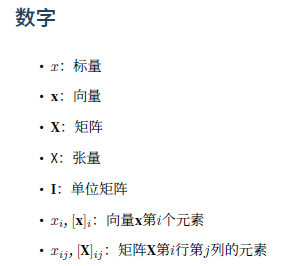
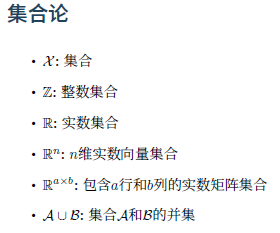
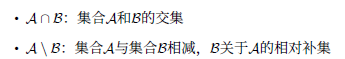
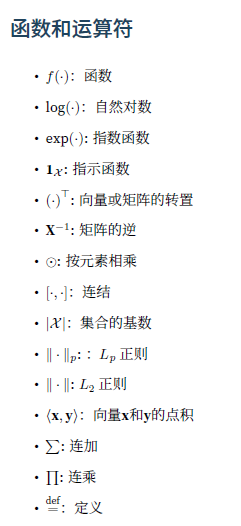
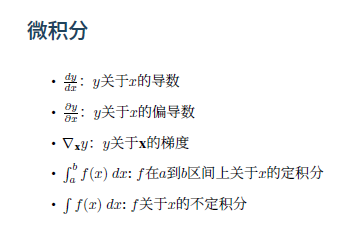
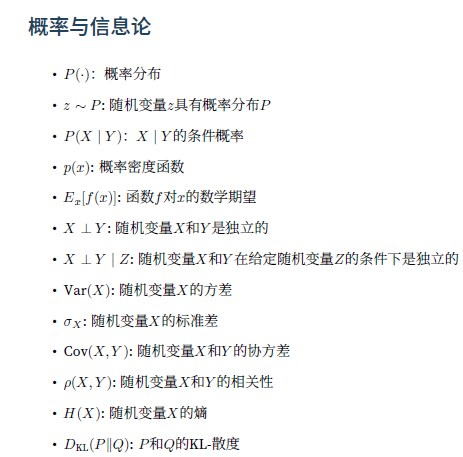
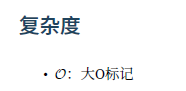

In [5]:
x = torch.arange(12)
x

NameError: name 'torch' is not defined

In [6]:
x.shape

torch.Size([12])

In [8]:
x.numel()

12

In [10]:
X=x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [11]:
# 自动计算维度
x.reshape(-1,4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [13]:
torch.zeros(2,3,4,dtype=torch.int32)

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=torch.int32)

In [16]:
torch.randn(3,4)

tensor([[ 1.2731,  2.6761,  1.1911,  0.0300],
        [-1.0330, -0.1238,  0.1599, -0.4913],
        [-1.0916,  0.7913,  2.2376, -0.0771]])

In [26]:
# 广播机制， 扩展张量维度和形状的机制

# 一维张量
A=torch.tensor([1,2,3])
B=torch.tensor([2])
C=A+B # 等价于[1+2,2+2,3+2]
print(C)
print(C.shape)

# 二维张量与一维张量广播
A=torch.tensor([[1,2,3],[4,5,6]])
B=torch.tensor([10,20,30])
C=A+B
print(C)



tensor([3, 4, 5])
torch.Size([3])
tensor([[11, 22, 33],
        [14, 25, 36]])
tensor([10, 20, 30])


In [30]:
a=torch.arange(3).reshape(3,1)
b=torch.arange(2).reshape(1,2)
print(a,b)

print(a+b)
print(a*b)

tensor([[0],
        [1],
        [2]]) tensor([[0, 1]])
tensor([[0, 1],
        [1, 2],
        [2, 3]])
tensor([[0, 0],
        [0, 1],
        [0, 2]])


In [33]:
# 分配内存的问题
Y = torch.arange(12).reshape(3,4)
Z = torch.zeros_like(Y)
print(Y)
print(Z)


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])


In [34]:
Y[-1]

tensor([ 8,  9, 10, 11])

In [35]:
Y[1:3]

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [36]:
Y[1,3]=9
Y

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  9],
        [ 8,  9, 10, 11]])

In [42]:
Y[:2,:]=100
Y
Y1=Y
id(Y1)==id(Y)

True

In [10]:
# 2.1.6 转换为其他python对象

X=torch.arange(12).reshape(3,4)
A=X.numpy()
B=torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [11]:
# 将大小为1的张量转换为Python标量
a=torch.tensor([3.2])
a.item(),float(a),int(a) # 转换为python标量

(3.200000047683716, 3.200000047683716, 3)